# Background

Each bout of DHP photos consists of 12 exopsures, of which 8 must be good in order for the sample to meet the data quality criteria.  We want to know: what is the probability P_s that the set is good given the probability P_i that any given photo is good?

# Method
 
We address this through the use of simulations: for a given value of P_i, we generate a set of N realizations of a set of 12 images and count how many of these have at least 8 good images.

In [1]:
import numpy as np
from numpy.random import binomial

# Routine to do one realization...
def bout (n, n_good_min, p):
    '''
    Generate a set of n events in which each event has a probability
    p of being "good".  If at least n_good_min events are "good", 
    then the set is "good".  Return True if the set is good, else False.
    '''
    
    n_good = binomial(n, p)
    if n_good >= n_good_min:
        state = True
    else:
        state = False
    return state

In [2]:
def success_fraction(p,n_samples):
    '''
    Given a success fraction of P and a number of samples n_samp,
    return the fraction of the samples which is good.
    '''
    
    # initialize counter...
    count = 0
    n=12
    n_good_min=8
    
    for i in range(0,n_samples):
        if bout( n, n_good_min, p):
            count += 1
          
    goodfrac = float(count)/float(n_samples)
    return goodfrac

# Test case

Given that the probability of each photo being good is 0.7, what is the likelihood that the bout is good?

In [3]:
p = 0.7
n_samples = 1000

success_fraction( p, n_samples)

0.713

# Generate the curve for a range of probabilities

In [4]:
n_trials = 20
x = np.array(range(0,n_trials))
frac = np.empty(n_trials)
probs = 1. - 0.5**(0.25*(x+1))
print "x=", x
print "probs=", probs

for i in x:
    p = probs[i]
    frac[i] = success_fraction( p, n_samples)
    print "p=%.5f f=%.5f" % (p, frac[i])


x= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
probs= [ 0.15910358  0.29289322  0.40539644  0.5         0.57955179  0.64644661
  0.70269822  0.75        0.7897759   0.8232233   0.85134911  0.875
  0.89488795  0.91161165  0.92567456  0.9375      0.94744397  0.95580583
  0.96283728  0.96875   ]
p=0.15910 f=0.00000
p=0.29289 f=0.01000
p=0.40540 f=0.06800
p=0.50000 f=0.18800
p=0.57955 f=0.39300
p=0.64645 f=0.58300
p=0.70270 f=0.70800
p=0.75000 f=0.84800
p=0.78978 f=0.92500
p=0.82322 f=0.95400
p=0.85135 f=0.97700
p=0.87500 f=0.98700
p=0.89489 f=0.99700
p=0.91161 f=0.99600
p=0.92567 f=0.99800
p=0.93750 f=0.99900
p=0.94744 f=1.00000
p=0.95581 f=1.00000
p=0.96284 f=1.00000
p=0.96875 f=1.00000


# Find the point at which the success probability is 99%

In [5]:
from scipy import interpolate
f = interpolate.interp1d(frac, probs)
bout_success_probability = 0.99
photo_success_probability = f(bout_success_probability)   # use interpolation function returned by `interp1d`


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

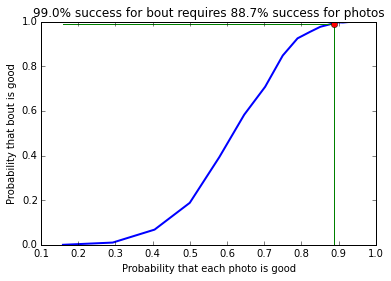

In [8]:
line, = plt.plot(probs, frac, 'b-', linewidth=2)

x0 = min(probs)
y0 = min(frac)
xcut = np.array([x0,photo_success_probability,photo_success_probability])
ycut = np.array([bout_success_probability,bout_success_probability,y0])
plt.plot(xcut, ycut, 'g-')
plt.plot(photo_success_probability, bout_success_probability, 'ro')

plt.xlabel('Probability that each photo is good')
plt.ylabel('Probability that bout is good')
plt.title("%.1f%% success for bout requires %.1f%% success for photos" % 
          (bout_success_probability*100., photo_success_probability*100.))
plt.show()

# Find the point at which the success probability is 95%

In [9]:
bout_success_probability = 0.95
photo_success_probability = f(bout_success_probability)   # use interpolation function returned by `interp1d`

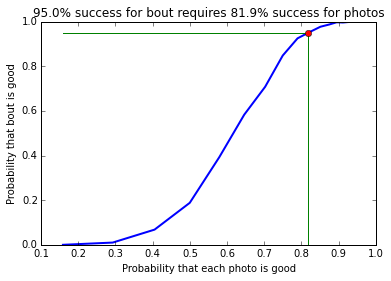

In [10]:
line, = plt.plot(probs, frac, 'b-', linewidth=2)

x0 = min(probs)
y0 = min(frac)
xcut = np.array([x0,photo_success_probability,photo_success_probability])
ycut = np.array([bout_success_probability,bout_success_probability,y0])
plt.plot(xcut, ycut, 'g-')
plt.plot(photo_success_probability, bout_success_probability, 'ro')

plt.xlabel('Probability that each photo is good')
plt.ylabel('Probability that bout is good')
plt.title("%.1f%% success for bout requires %.1f%% success for photos" 
    % (bout_success_probability*100., photo_success_probability*100.))
plt.show()